In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

## Pre-processing

In [ ]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

# **Handling Missing Values**

In [ ]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
df = pd.read_csv('bank.csv', na_values = missing_values)

print(df.isnull().sum())

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [ ]:
 #replace nan values with the mode
df["job"].fillna("management", inplace=True)
df["education"].fillna("secondary", inplace=True) 
df["contact"].fillna("cellular", inplace=True) 
df["poutcome"].fillna("failure", inplace=True) 

#**Handling Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


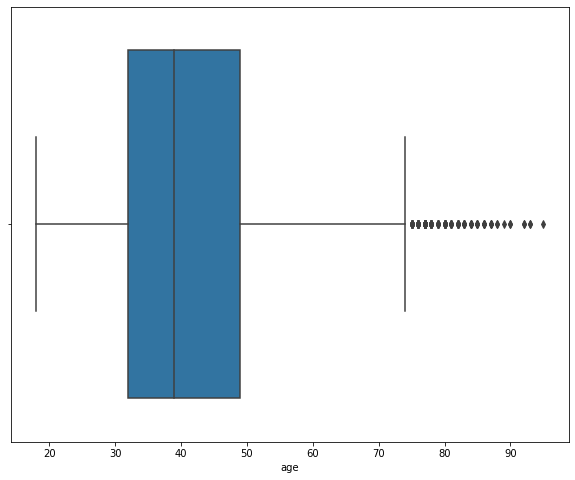

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(10,8))

max = df.age.quantile(0.75)
min = df.age.quantile(0.25)
sns.boxplot(df.age)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


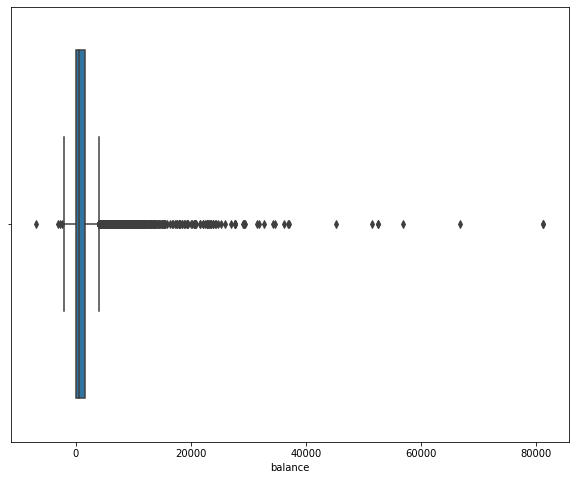

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
max = df.balance.quantile(0.75)
min = df.balance.quantile(0.25)
sns.boxplot(df.balance)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


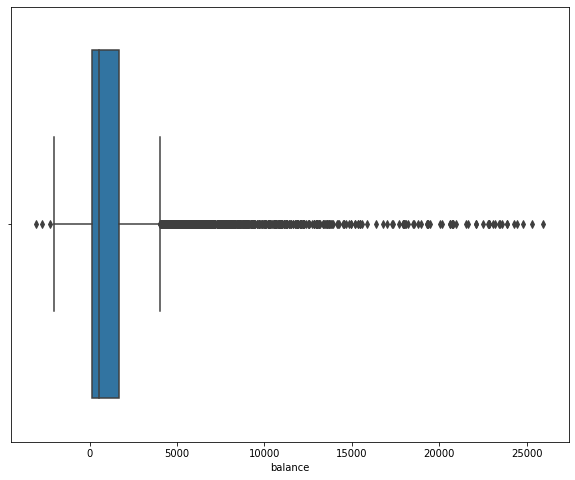

In [ ]:
# removing datapoints that have balance values greater than 50000 and less than -6000
fig, axes = plt.subplots(figsize=(10,8))
df = df[(df['balance']>-6000) & (df['balance']<26000)]
sns.boxplot(df['balance'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


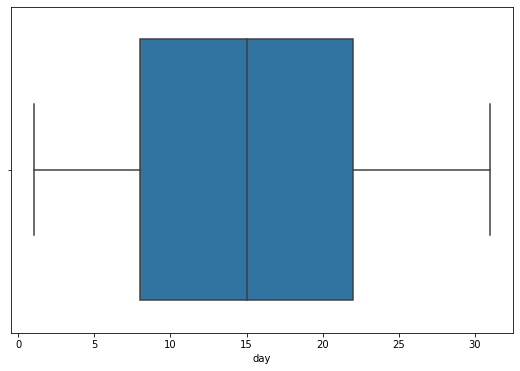

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

## Max and Min Quantile
max_val = df.balance.quantile(0.75)
min_val = df.balance.quantile(0.25)

sns.boxplot(df['day'])
plt.show()

Duration Shape: (11135, 17)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


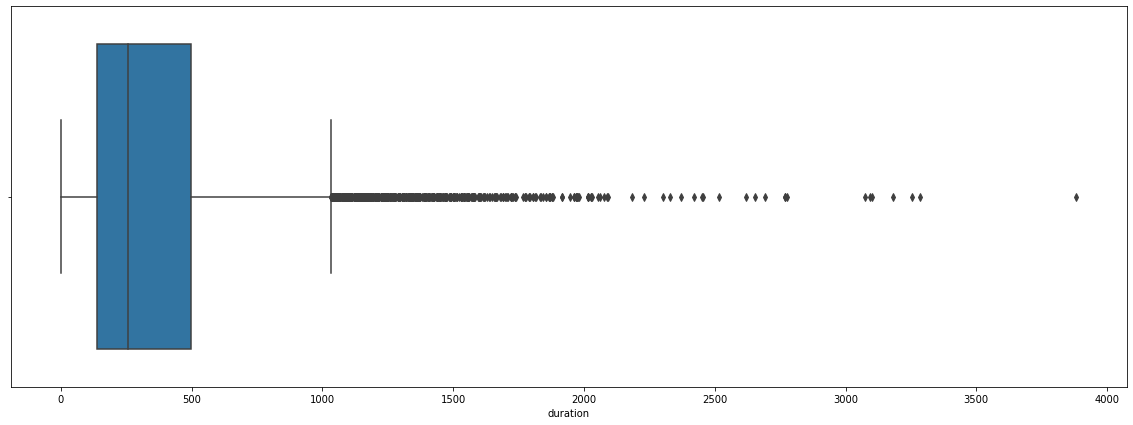

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for duration feature
print("Duration Shape:",df.shape)
## Max and Min Quantile
max_val = df.balance.quantile(0.75)
min_val = df.balance.quantile(0.25)

sns.boxplot(df['duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


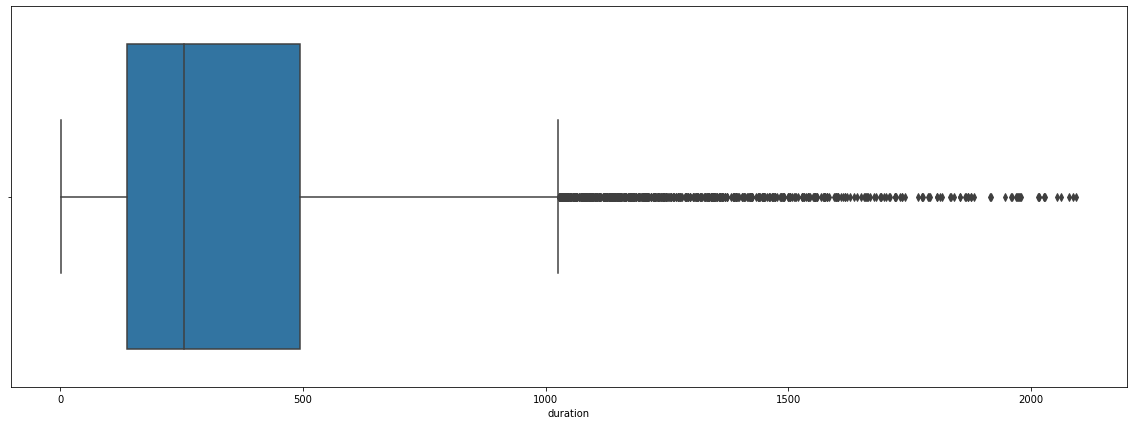

In [ ]:
# removing datapoints that have duration values greater than 2100
fig, axes = plt.subplots(figsize=(20, 7))

df = df[(df['duration']<2100)]

sns.boxplot(df['duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


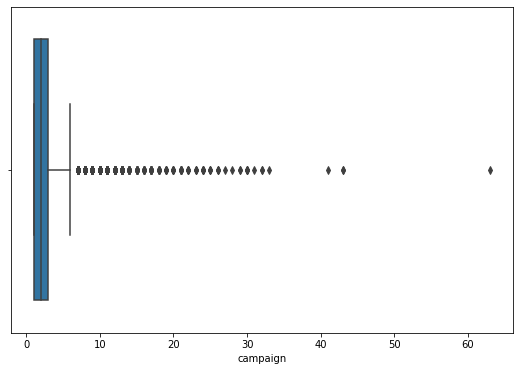

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

## Max and Min Quantile
max_val = df.campaign.quantile(0.75)
min_val = df.campaign.quantile(0.25)

sns.boxplot(df['campaign'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


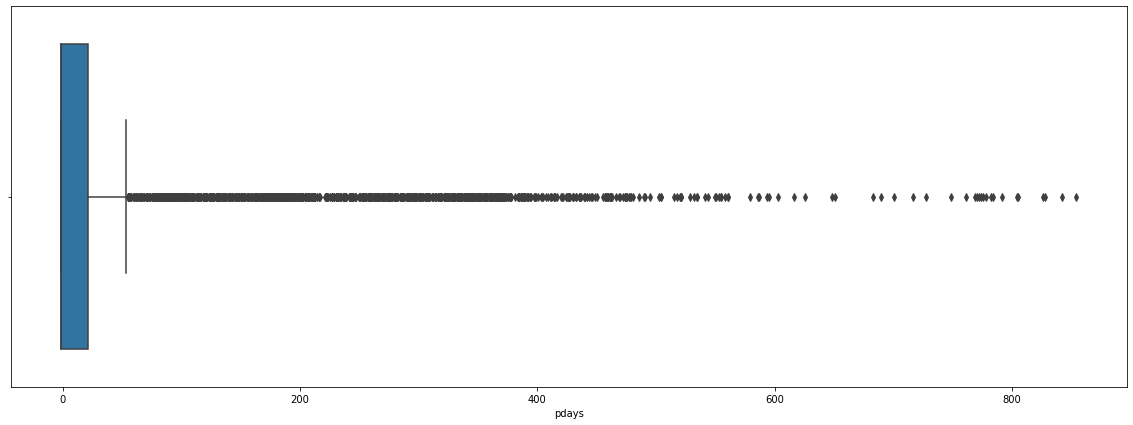

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

## Max and Min Quantile
max_val = df.pdays.quantile(0.75)
min_val = df.pdays.quantile(0.25)

sns.boxplot(df['pdays'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


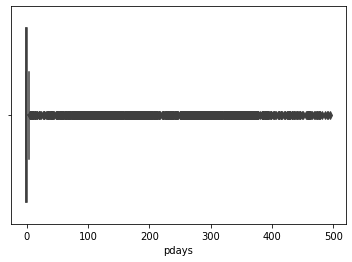

In [ ]:
# removing datapoints that have pdays values greater than 500
df = df[(df['pdays']<500)]
sns.boxplot(df['pdays'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


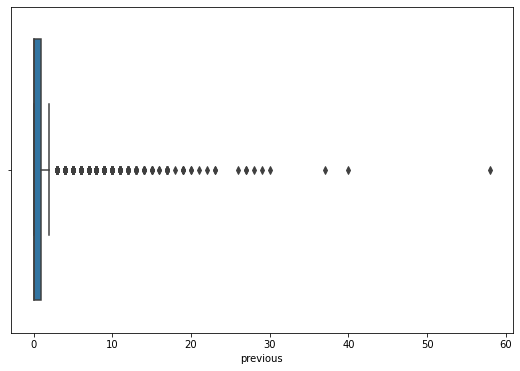

In [ ]:

fig, axes = plt.subplots(figsize=(9, 6))

## Max and Min Quantile
max_val = df.previous.quantile(0.75)
min_val = df.previous.quantile(0.25)

sns.boxplot(df['previous'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


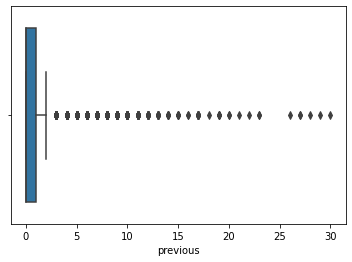

In [ ]:
# removing datapoints that have previous values greater than 31
df = df[(df['previous']<31)]
sns.boxplot(df['previous'])
plt.show()

# **Feature Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode strings to integer
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11055, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    dff = pd.get_dummies(df[item], prefix=item)
    df = df.drop(item, axis=1)
    for categorial_feature in dff.columns:
        #Set the new column in data to have corresponding df values
        df[categorial_feature] = dff[categorial_feature]

In [ ]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    df.replace({item:bin_dict},inplace=True)

In [ ]:
# checking the values in education field
df['education'].value_counts()

education_mapper = {"primary":1, "secondary":2, "tertiary":3}
df["education"] = df["education"].replace(education_mapper)
df

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,59,2,0,2343,1,0,5,1042,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,56,2,0,45,0,0,5,1467,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,41,2,0,1270,1,0,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,55,2,0,2476,1,0,5,579,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,54,3,0,184,0,0,5,673,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,1,1,0,20,257,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11158,39,2,0,733,0,0,16,83,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11159,32,2,0,29,0,0,19,156,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
11160,43,2,0,0,0,1,8,9,2,172,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
y = df['deposit']
X = df.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.000000,-0.198417,-0.010015,0.098647,-0.165328,-0.033979,0.002239,-0.002328,-0.004898,0.000975,0.029976,0.032572,-0.051458,-0.066709,0.023212,0.087434,-0.043893,0.550701,-0.022807,-0.079171,-0.232114,-0.080332,-0.003358,0.191520,0.318343,-0.471010,-0.209839,0.209839,-0.032504,0.064730,0.041149,0.006624,0.009524,-0.009668,0.016198,0.024945,-0.122290,0.025099,0.065424,0.046705,-0.038237,-0.021919
1,-0.198417,1.000000,-0.018200,0.067574,-0.096840,-0.055914,0.002817,-0.009623,-0.010472,0.015810,0.042482,0.101076,-0.060797,-0.372067,0.015344,-0.131444,0.518680,-0.156985,0.087396,-0.103534,-0.007752,0.047003,-0.035850,-0.031970,-0.134250,0.165222,0.075893,-0.075893,0.017591,0.097741,0.000394,0.042181,-0.000667,-0.062496,-0.033497,0.056690,-0.095331,0.024974,0.019649,0.029375,-0.065228,0.014250
2,-0.010015,-0.018200,1.000000,-0.072886,0.014414,0.074266,0.016298,-0.007729,0.037597,-0.042174,-0.039453,-0.039621,-0.030522,0.029944,0.017106,0.005096,-0.000524,-0.015493,0.010296,-0.013831,-0.016981,0.006097,0.009221,0.017784,-0.013179,0.001894,0.019228,-0.019228,-0.020054,-0.010352,-0.012551,-0.015104,0.009698,0.044715,0.021742,-0.019797,0.001700,-0.001822,-0.023382,-0.014930,0.048607,-0.023723
3,0.098647,0.067574,-0.072886,1.000000,-0.086620,-0.101952,0.019593,0.027685,-0.020230,0.030424,0.047056,0.101485,-0.039465,-0.058677,-0.013061,-0.014582,0.066077,0.062529,0.008862,-0.042237,0.006579,0.013908,-0.005190,-0.025757,0.027588,-0.011820,-0.045256,0.045256,0.017716,0.001173,0.025927,-0.006160,-0.023790,-0.065444,0.011183,0.035588,-0.073455,0.101106,0.049766,0.031857,-0.055951,0.021401
4,-0.165328,-0.096840,0.014414,-0.086620,1.000000,0.073642,-0.006763,0.038992,0.006179,0.066075,-0.013628,-0.208568,0.061360,0.185350,0.014519,-0.065201,-0.073313,-0.166967,-0.020630,0.084384,-0.120858,0.010235,-0.060892,-0.002708,0.041628,-0.042590,0.093979,-0.093979,0.028451,-0.231111,-0.060462,-0.076713,-0.080355,-0.024388,-0.084185,-0.084115,0.428625,0.017466,-0.101711,-0.083563,0.115066,0.004473
5,-0.033979,-0.055914,0.074266,-0.101952,0.073642,1.000000,0.018487,0.000906,0.033682,-0.036622,-0.034076,-0.109638,0.049257,0.063552,0.033751,-0.027705,-0.050291,-0.052181,0.002033,0.027768,-0.068189,0.011488,-0.040182,0.019588,0.040005,-0.056123,0.016947,-0.016947,-0.037002,-0.064206,-0.029472,-0.011211,0.010606,0.165516,-0.019284,-0.040814,0.005556,0.014480,-0.033200,-0.050496,0.083438,-0.022954
6,0.002239,0.002817,0.016298,0.019593,-0.006763,0.018487,1.000000,-0.017395,0.138802,-0.083551,-0.055206,-0.057060,-0.020293,-0.018682,-0.001366,0.013487,0.006528,-0.004738,0.001847,0.002999,-0.013578,0.034301,-0.007208,0.004978,0.003195,-0.006819,-0.025151,0.025151,0.105351,-0.008748,-0.016078,-0.232888,0.217651,0.128403,-0.185892,-0.034031,-0.008640,0.062833,0.080951,-0.075510,0.048204,-0.010620
7,-0.002328,-0.009623,-0.007729,0.027685,0.038992,0.000906,-0.017395,1.000000,-0.039302,-0.019312,-0.019541,0.461997,-0.027454,0.023838,-0.009087,-0.014200,-0.022204,0.023549,0.019567,0.016275,-0.019037,-0.007190,0.026872,0.006728,-0.038052,0.036020,0.021862,-0.021862,0.024800,-0.017860,0.006922,-0.027233,-0.010031,0.061795,-0.016883,-0.049807,0.015599,-0.008270,-0.014463,-0.015219,0.015911,-0.000048
8,-0.004898,-0.010472,0.037597,-0.020230,0.006179,0.033682,0.138802,-0.039302,1.000000,-0.101115,-0.054119,-0.127410,-0.018497,0.004649,0.008158,0.012266,0.015025,-0.034599,-0.002073,0.019275,-0.026965,0.022615,-0.029480,0.000596,0.046953,-0.050538,-0.048404,0.048404,-0.074723,0.158989,-0.014765,-0.036975,-0.051891,0.109416,0.057894,-0.030189,-0.046496,-0.081283,-0.071771,-0.050127,0.094223,-0.023306
9,0.000975,0.015810,-0.042174,0.030424,0.066075,-0.036622,-0.083551,-0.019312,-0.101115,1.000000,0.542496,0.151892,0.050399,-0.026947,-0.030843,-0.034603,0.004390,0.008357,-0.008904,0.000869,0.037466,-0.018752,0.012846,-0.017372,-0.021310,0.034646,-0.015329,0.01532

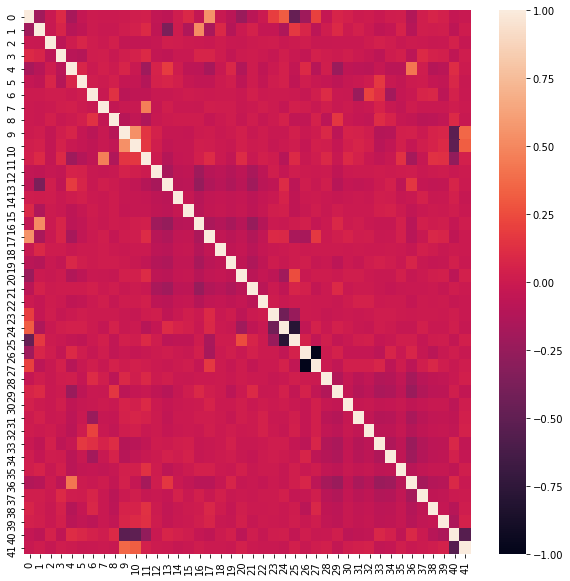

In [ ]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3   ...        38        39        40        41
0  NaN -0.198417 -0.010015  0.098647  ...  0.065424  0.046705 -0.038237 -0.021919
1  NaN       NaN -0.018200  0.067574  ...  0.019649  0.029375 -0.065228  0.014250
2  NaN       NaN       NaN -0.072886  ... -0.023382 -0.014930  0.048607 -0.023723
3  NaN       NaN       NaN       NaN  ...  0.049766  0.031857 -0.055951  0.021401
4  NaN       NaN       NaN       NaN  ... -0.101711 -0.083563  0.115066  0.004473
5  NaN       NaN       NaN       NaN  ... -0.033200 -0.050496  0.083438 -0.022954
6  NaN       NaN       NaN       NaN  ...  0.080951 -0.075510  0.048204 -0.010620
7  NaN       NaN       NaN       NaN  ... -0.014463 -0.015219  0.015911 -0.000048
8  NaN       NaN       NaN       NaN  ... -0.071771 -0.050127  0.094223 -0.023306
9  NaN       NaN       NaN       NaN  ...  0.061441  0.072964 -0.524548  0.362493
10 NaN       NaN       NaN       NaN  ...  0.059123  0.095675 -0.512221  0.327113
11 NaN       NaN

In [ ]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,-0.437308,-0.298919,-0.12347,-0.062678,-0.948412,-0.387923,0.989937,-0.750909,-0.188128,-0.492005,-0.388134,-0.943433,2.714528,-0.460043,-0.173761,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,-1.149567,1.474754,-3.680496,3.680496,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,2.522913,-0.350741,-0.158823,-0.584349,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
1,0.823565,-0.298919,-0.12347,0.629084,-0.948412,-0.387923,-1.027214,0.327552,-0.554411,3.022778,0.094686,1.059958,2.714528,-0.460043,-0.173761,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,0.869893,-0.678079,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,1.711307,-0.304314,-0.188672,-0.16844,-2.451560,4.505616
2,-0.437308,1.233094,-0.12347,1.296650,-0.948412,-0.387923,-0.077966,-0.796223,-0.554411,-0.492005,-0.388134,-0.943433,2.714528,-0.460043,-0.173761,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,2.763461,-1.149567,-0.678079,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,2.851108,-0.158823,-0.584349,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
3,-0.857599,-0.298919,-0.12347,-0.569600,-0.948412,-0.387923,0.515313,-0.835495,-0.188128,-0.492005,-0.388134,-0.943433,-0.368388,-0.460043,-0.173761,-0.158524,1.803309,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,0.869893,-0.678079,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,2.522913,-0.350741,-0.158823,-0.584349,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
4,1.411972,-0.298919,-0.12347,-0.551354,1.054395,-0.387923,-0.077966,-0.883829,-0.188128,-0.492005,-0.388134,-0.943433,-0.368388,-0.460043,-0.173761,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,2.261524,-0.181882,-0.361865,0.869893,-0.678079,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,1.711307,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8839,0.403274,1.233094,-0.12347,1.303789,1.054395,-0.387923,-0.908558,0.113068,-0.554411,-0.492005,-0.388134,-0.943433,-0.368388,-0.460043,5.755030,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,0.869893,-0.678079,0.271702,-0.271702,3.326977,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,-0.584349,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
8840,-0.773541,-1.830933,-0.12347,-0.573170,1.054395,-0.387923,-1.145870,-0.599864,-0.188128,-0.492005,-0.388134,-0.943433,-0.368388,2.173709,-0.173761,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,0.869893,-0.678079,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,1.711307,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
8841,-1.025715,-0.298919,-0.12347,-0.204680,-0.948412,-0.387923,1.227249,-0.104437,-0.554411,-0.492005,-0.388134,-0.943433,-0.368388,-0.460043,-0.173761,-0.158524,1.803309,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,-1.149567,1.474754,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,1.711307,-0.304314,-0.188672,-0.16844,0.407904,-0.221945
8842,-0.521366,-0.298919,-0.12347,-0.227289,1.054395,-0.387923,0.396658,-0.666324,-0.554411,-0.492005,-0.388134,-0.943433,-0.368388,-0.460043,5.755030,-0.158524,-0.554536,-0.273426,-0.194006,-0.300931,-0.182941,-0.442180,-0.181882,-0.361865,-1.149567,1.474754,0.271702,-0.271702,-0.300573,-0.396978,-0.099326,-0.272661,-0.178403,-0.396367,-0.350741,-0.158823,-0.584349,3.286076,-0.188672,-0.16844,0.40

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier 
# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 200, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)